# 목적에 맞게 데이터 수정하기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.ticker as mticker

In [3]:
total = pd.read_csv("C:/Users/김지희/DSL/dataset/channel_total.csv",  lineterminator='\n') # 인기동영상에 오른 채널들에 대한 정보를 추가로 크롤링한 자료 (채널당 최대 90개의 영상을 크롤링)
trend = pd.read_csv("C:/Users/김지희/DSL/dataset/youtube_nodouble.csv", lineterminator='\n') # 2020.7 ~ 2022.8까지의 인기동영상 목록

In [4]:
# total의 dataframe 모양 확인하기
total

,channelId,video_time,video_id,when,title,minute_time,seconds_time,open,totalview,subscriber
0,UCu9BCtGIEr73LXZsKmoujKw,4:58,u6lyUnhaaqk,10일 전,.,4.966667,298.0,2014-08-25,2.683340e+09,3230000.0
1,UCu9BCtGIEr73LXZsKmoujKw,10:45,_LpMHqmScuk,8개월 전,판결 나왔습니다,10.750000,645.0,2014-08-25,2.683340e+09,3230000.0
2,UCu9BCtGIEr73LXZsKmoujKw,11:53,2eHrT-Fgs78,9개월 전,현재 재판진행상황,11.883333,713.0,2014-08-25,2.683340e+09,3230000.0
3,UCu9BCtGIEr73LXZsKmoujKw,9:41,6MiItImFYbk,9개월 전,우리 깐부 맞지?,9.683333,581.0,2014-08-25,2.683340e+09,3230000.0
4,UCu9BCtGIEr73LXZsKmoujKw,SHORTS,QdnvjTQ4X3c,9개월 전,섹드립논란#Shorts,NaN,NaN,2014-08-25,2.683340e+09,3230000.0
...,...,...,...,...,...,...,...,...,...,...
217797,UCLhgIX2L5ZCaWdlaxR_oTAg,0:31,7mOehhot8aY,7개월 전,デジモンゴーストゲーム 第9話予告 「捻レタ時」,0.516667,31.0,2014-01-16,2.962483e+08,578000.0
217798,UCLhgIX2L5ZCaWdlaxR_oTAg,0:30,jNlz_I1hPCs,7개월 전,アニメ「ドラゴンクエスト ダイの大冒険」 第60話予告 「ダイとポップ」,0.500000,30.0,2014-01-16,2.962483e+08,578000.0
217799,UCLhgIX2L5ZCaWdlaxR_oTAg,0:31,MMVF7bk5LO0,8개월 전,デジモンゴーストゲーム 第8話予告 「百鬼夜行」,0.516667,31.0,2014-01-16,2.962483e+08,578000.0
217800,UCLhgIX2L5ZCaWdlaxR_oTAg,0:30,en22N3o1tiM,8개월 전,アニメ「ドラゴンクエスト ダイの大冒険」 第59話予告 「生存者たち」,0.500000,30.0,2014-01-16,2.962483e+08,578000.0


In [5]:
# trend의 dataframe 모양 확인하기
trend

,Unnamed: 0,video_id,title,publishedAt,channelId,channelTitle,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,category_name,tag_num
0,0,uq5LClQN3cE,안녕하세요 보겸입니다,2020-08-09 09:32:48,UCu9BCtGIEr73LXZsKmoujKw,보겸 BK,2020-08-12 00:00:00,보겸|bokyem,5947503,53326,105756,139946,False,False,NaN,Entertainment,2
1,1,I-ZbZCHsHD0,부락토스의 계획 [총몇명 프리퀄],2020-08-12 09:00:08,UCRuSxVu4iqTK5kCh90ntAgA,총몇명,2020-08-12 00:00:00,총몇명|재밌는 만화|부락토스|루시퍼|총몇명 프리퀄|총몇명 스토리,963384,28244,494,3339,False,False,"오늘도 정말 감사드립니다!!총몇명 스튜디오 - 총몇명, 십제곱, 5G민, MOVE혁...",Film & Animation,6
2,2,9d7jNUjBoss,평생 반성하면서 살겠습니다.,2020-08-10 09:54:13,UCMVC92EOs9yDJG5JS-CMesQ,양팡 YangPang,2020-08-12 00:00:00,양팡|양팡유튜브|팡튜브|가족시트콤|양팡가족|양팡가족시트콤|양팡언니|현실남매|현실자매...,2950885,17974,68898,50688,False,False,NaN,People & Blogs,27
3,3,3pI_L3-sMVg,안녕하세요 꽈뚜룹입니다.,2020-08-11 15:00:58,UCkQCwnkQfgSuPTTnw_Y7v7w,꽈뚜룹 Quaddurup,2020-08-12 00:00:00,꽈뚜룹|한국여행기|quaddurup|뚜룹이|korea|southkorea|vlog|...,1743374,36893,1798,8751,False,False,앞으로 좀 더 깔끔한 영상제작 약속 드리겠습니다.늘 감사드립니다,Entertainment,12
4,4,zrsBjYukE8s,박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V,2020-08-11 09:00:13,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,2020-08-12 00:00:00,JYP Entertainment|JYP|J.Y.Park|JYPark|박진영|선미|S...,3433885,353337,9763,23405,False,False,MelOn http://kko.to/TWyXd7zYjSpotify https://s...,Music,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133536,137536,3V9mAYiJQhg,탑건 코르키,2022-06-27 12:02:13,UCEu_YKdz0lMz1NkB3vlUyyw,승상싱,2022-07-11 00:00:00,[None],607612,8141,0,1051,False,False,만당주신 분 : 도움,Gaming,0
133537,137537,wHR4Ri2tT-0,[골프레슨] 왼팔동작과 가속하는 방향만 알아도 던지는 스윙 가능합니다!,2022-06-28 23:00:31,UCZSNhOLPx3q87ss_N-vsmSA,[골프맨]조윤성프로,2022-07-11 00:00:00,골프|골프레슨|golf|golf lesson|드라이버|아이언|골프맨|조윤성프로|골프...,841197,8254,0,184,False,False,조윤성프로 (호주PGA)Email: davidcho@pgamember.org.auI...,Sports,52
133538,137538,1BvHmtDOh6o,세용이랑 결혼 10주년 여행 눈물짜르륵..,2022-06-27 12:00:00,UCWuWpKhbGev8Za4J-jfdSXw,영기티비,2022-07-11 00:00:00,글램핑|캠핑여행|남자친구랑여행|홍영기|이세용|영기티비|데이트코스|여행추천,757676,14804,0,774,False,False,https://bit.ly/3n2lb5G영기가 추천하는 콤부차 🥰❤️,People & Blogs,8
133539,137539,JC6budcACNE,fromis_9 (프로미스나인) 'Stay This Way' Official MV,2022-06-27 08:58:10,UC3IZKseVpdzPSBaWxBxundA,HYBE LABELS,2022-07-11 00:00:00,HYBE|HYBE LABELS|하이브|하이브레이블즈,16745515,202098,0,13180,False,False,fromis_9 (프로미스나인) 'Stay This Way' Official MV#...,Music,4


In [6]:
# 인기동영상 dataset에서 부족했던 정보들을 total dataset과의 merge를 통해 추가함
trend_total = pd.merge(trend, total[['video_id', 'minute_time', 'open', 'totalview', 'subscriber']], left_on="video_id", right_on = 'video_id', how='left')

In [7]:
trend_total

,Unnamed: 0,video_id,title,publishedAt,channelId,channelTitle,trending_date,tags,view_count,likes,...,comment_count,comments_disabled,ratings_disabled,description,category_name,tag_num,minute_time,open,totalview,subscriber
0,0,uq5LClQN3cE,안녕하세요 보겸입니다,2020-08-09 09:32:48,UCu9BCtGIEr73LXZsKmoujKw,보겸 BK,2020-08-12 00:00:00,보겸|bokyem,5947503,53326,...,139946,False,False,NaN,Entertainment,2,NaN,NaN,NaN,NaN
1,1,I-ZbZCHsHD0,부락토스의 계획 [총몇명 프리퀄],2020-08-12 09:00:08,UCRuSxVu4iqTK5kCh90ntAgA,총몇명,2020-08-12 00:00:00,총몇명|재밌는 만화|부락토스|루시퍼|총몇명 프리퀄|총몇명 스토리,963384,28244,...,3339,False,False,"오늘도 정말 감사드립니다!!총몇명 스튜디오 - 총몇명, 십제곱, 5G민, MOVE혁...",Film & Animation,6,NaN,NaN,NaN,NaN
2,2,9d7jNUjBoss,평생 반성하면서 살겠습니다.,2020-08-10 09:54:13,UCMVC92EOs9yDJG5JS-CMesQ,양팡 YangPang,2020-08-12 00:00:00,양팡|양팡유튜브|팡튜브|가족시트콤|양팡가족|양팡가족시트콤|양팡언니|현실남매|현실자매...,2950885,17974,...,50688,False,False,NaN,People & Blogs,27,NaN,NaN,NaN,NaN
3,3,3pI_L3-sMVg,안녕하세요 꽈뚜룹입니다.,2020-08-11 15:00:58,UCkQCwnkQfgSuPTTnw_Y7v7w,꽈뚜룹 Quaddurup,2020-08-12 00:00:00,꽈뚜룹|한국여행기|quaddurup|뚜룹이|korea|southkorea|vlog|...,1743374,36893,...,8751,False,False,앞으로 좀 더 깔끔한 영상제작 약속 드리겠습니다.늘 감사드립니다,Entertainment,12,NaN,NaN,NaN,NaN
4,4,zrsBjYukE8s,박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V,2020-08-11 09:00:13,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,2020-08-12 00:00:00,JYP Entertainment|JYP|J.Y.Park|JYPark|박진영|선미|S...,3433885,353337,...,23405,False,False,MelOn http://kko.to/TWyXd7zYjSpotify https://s...,Music,13,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133536,137536,3V9mAYiJQhg,탑건 코르키,2022-06-27 12:02:13,UCEu_YKdz0lMz1NkB3vlUyyw,승상싱,2022-07-11 00:00:00,[None],607612,8141,...,1051,False,False,만당주신 분 : 도움,Gaming,0,9.483333,2020-12-25,1.012427e+08,375000.0
133537,137537,wHR4Ri2tT-0,[골프레슨] 왼팔동작과 가속하는 방향만 알아도 던지는 스윙 가능합니다!,2022-06-28 23:00:31,UCZSNhOLPx3q87ss_N-vsmSA,[골프맨]조윤성프로,2022-07-11 00:00:00,골프|골프레슨|golf|golf lesson|드라이버|아이언|골프맨|조윤성프로|골프...,841197,8254,...,184,False,False,조윤성프로 (호주PGA)Email: davidcho@pgamember.org.auI...,Sports,52,6.383333,2012-01-06,1.085376e+08,461000.0
133538,137538,1BvHmtDOh6o,세용이랑 결혼 10주년 여행 눈물짜르륵..,2022-06-27 12:00:00,UCWuWpKhbGev8Za4J-jfdSXw,영기티비,2022-07-11 00:00:00,글램핑|캠핑여행|남자친구랑여행|홍영기|이세용|영기티비|데이트코스|여행추천,757676,14804,...,774,False,False,https://bit.ly/3n2lb5G영기가 추천하는 콤부차 🥰❤️,People & Blogs,8,24.166667,2013-11-25,1.131884e+08,636000.0
133539,137539,JC6budcACNE,fromis_9 (프로미스나인) 'Stay This Way' Official MV,2022-06-27 08:58:10,UC3IZKseVpdzPSBaWxBxundA,HYBE LABELS,2022-07-11 00:00:00,HYBE|HYBE LABELS|하이브|하이브레이블즈,16745515,202098,...,13180,False,False,fromis_9 (프로미스나인) 'Stay This Way' Official MV#...,Music,4,3.550000,2008-06-04,2.376216e+10,67600000.0


In [8]:
# open과 trending_date를 datetime으로 만들기
trend_total['open'] = pd.to_datetime(trend_total['open'])
trend_total['trending_date'] = pd.to_datetime(trend_total['trending_date'])

In [9]:
# 둘을 빼서 일수를 카운트하자
trend_total['trending_date']-trend_total['open']

0              NaT
1              NaT
2              NaT
3              NaT
4              NaT
            ...   
133536    563 days
133537   3839 days
133538   3150 days
133539   5150 days
133540   2538 days
Length: 133541, dtype: timedelta64[ns]

In [10]:
# 채널을 생성하고나서 1년 이내에 인기동영상으로 뽑한 인기동영상 수를 확인하기
((trend_total['trending_date']-trend_total['open']).dt.days<= 365).value_counts()

False    126807
True       6734
dtype: int64

In [11]:
# 분석에 필요할 정보로 생각이 들어 새로운 열로 만들어줌
trend_total['time_diff'] = (trend_total['trending_date']-trend_total['open']).dt.days

In [173]:
# time_diff가 365일 이내인 인기동영상 목록을 newbie로 저장함 
newbie = trend_total[trend_total['time_diff']<= 365]

In [175]:
# newbie에 속한 인기동영상들의 채널들의 수를 확인하기
print(len(newbie['channelId'].unique()))

241
1239


In [177]:
newbie.head()

,Unnamed: 0,video_id,title,publishedAt,channelId,channelTitle,trending_date,tags,view_count,likes,...,comments_disabled,ratings_disabled,description,category_name,tag_num,minute_time,open,totalview,subscriber,time_diff
293,293,WK3Eqo46L0A,동네에서 팽이 좀 친 고수들의 찐 대결ㄷㄷ 그 시절 최강 팽이는? | 라떼월드 13화,2020-08-13 09:00:05,UCJ_2psysfQ6VY3phokvdR5A,라떼월드 Latte World,2020-08-14,studiolululala|JTBC|스튜디오룰루랄라|룰루랄라|허영지|추억|2000년...,57201,1396,...,False,False,★라떼월드 팬네임 이벤트★울 라떼월드 독립하자마자 벌써 많이 구독해줘서 너무너무 고...,People & Blogs,30,12.05,2020-08-04,12520654.0,138000.0,10.0
458,458,WK3Eqo46L0A,동네에서 팽이 좀 친 고수들의 찐 대결ㄷㄷ 그 시절 최강 팽이는? | 라떼월드 13화,2020-08-13 09:00:05,UCJ_2psysfQ6VY3phokvdR5A,라떼월드 Latte World,2020-08-15,studiolululala|JTBC|스튜디오룰루랄라|룰루랄라|허영지|추억|2000년...,90773,1652,...,False,False,★라떼월드 팬네임 이벤트★울 라떼월드 독립하자마자 벌써 많이 구독해줘서 너무너무 고...,People & Blogs,30,12.05,2020-08-04,12520654.0,138000.0,11.0
621,621,WK3Eqo46L0A,동네에서 팽이 좀 친 고수들의 찐 대결ㄷㄷ 그 시절 최강 팽이는? | 라떼월드 13화,2020-08-13 09:00:05,UCJ_2psysfQ6VY3phokvdR5A,라떼월드 Latte World,2020-08-16,studiolululala|JTBC|스튜디오룰루랄라|룰루랄라|허영지|추억|2000년...,111211,1821,...,False,False,★라떼월드 팬네임 이벤트★울 라떼월드 독립하자마자 벌써 많이 구독해줘서 너무너무 고...,People & Blogs,30,12.05,2020-08-04,12520654.0,138000.0,12.0
712,712,uuqWa8VHJ1I,떡볶이 인생을 건 영상,2020-08-16 11:30:59,UCZVD--cl8FLRn7kmSudAuBA,과나gwana,2020-08-17,떡볶이|고기떡볶이|삼겹살떡볶이|돼지고기떡볶이|닭고기떡볶이|크림떡볶이|된장떡볶이|족발...,312911,15521,...,False,False,고기떡볶이※국물이 적은 떡볶이입니다.국물이 많은 것을 원하시면 물과 조미료를 늘려주...,Entertainment,17,7.60,2019-10-05,141761224.0,769000.0,317.0
799,799,WK3Eqo46L0A,동네에서 팽이 좀 친 고수들의 찐 대결ㄷㄷ 그 시절 최강 팽이는? | 라떼월드 13화,2020-08-13 09:00:05,UCJ_2psysfQ6VY3phokvdR5A,라떼월드 Latte World,2020-08-17,studiolululala|JTBC|스튜디오룰루랄라|룰루랄라|허영지|추억|2000년...,134988,1960,...,False,False,★라떼월드 팬네임 이벤트★울 라떼월드 독립하자마자 벌써 많이 구독해줘서 너무너무 고...,People & Blogs,30,12.05,2020-08-04,12520654.0,138000.0,13.0


In [15]:
# newbie의 index를 초기화하기
newbie.reset_index(drop=True, inplace=True)

In [16]:
newbie

,Unnamed: 0,video_id,title,publishedAt,channelId,channelTitle,trending_date,tags,view_count,likes,...,comments_disabled,ratings_disabled,description,category_name,tag_num,minute_time,open,totalview,subscriber,time_diff
0,293,WK3Eqo46L0A,동네에서 팽이 좀 친 고수들의 찐 대결ㄷㄷ 그 시절 최강 팽이는? | 라떼월드 13화,2020-08-13 09:00:05,UCJ_2psysfQ6VY3phokvdR5A,라떼월드 Latte World,2020-08-14,studiolululala|JTBC|스튜디오룰루랄라|룰루랄라|허영지|추억|2000년...,57201,1396,...,False,False,★라떼월드 팬네임 이벤트★울 라떼월드 독립하자마자 벌써 많이 구독해줘서 너무너무 고...,People & Blogs,30,12.050000,2020-08-04,12520654.0,138000.0,10.0
1,458,WK3Eqo46L0A,동네에서 팽이 좀 친 고수들의 찐 대결ㄷㄷ 그 시절 최강 팽이는? | 라떼월드 13화,2020-08-13 09:00:05,UCJ_2psysfQ6VY3phokvdR5A,라떼월드 Latte World,2020-08-15,studiolululala|JTBC|스튜디오룰루랄라|룰루랄라|허영지|추억|2000년...,90773,1652,...,False,False,★라떼월드 팬네임 이벤트★울 라떼월드 독립하자마자 벌써 많이 구독해줘서 너무너무 고...,People & Blogs,30,12.050000,2020-08-04,12520654.0,138000.0,11.0
2,621,WK3Eqo46L0A,동네에서 팽이 좀 친 고수들의 찐 대결ㄷㄷ 그 시절 최강 팽이는? | 라떼월드 13화,2020-08-13 09:00:05,UCJ_2psysfQ6VY3phokvdR5A,라떼월드 Latte World,2020-08-16,studiolululala|JTBC|스튜디오룰루랄라|룰루랄라|허영지|추억|2000년...,111211,1821,...,False,False,★라떼월드 팬네임 이벤트★울 라떼월드 독립하자마자 벌써 많이 구독해줘서 너무너무 고...,People & Blogs,30,12.050000,2020-08-04,12520654.0,138000.0,12.0
3,712,uuqWa8VHJ1I,떡볶이 인생을 건 영상,2020-08-16 11:30:59,UCZVD--cl8FLRn7kmSudAuBA,과나gwana,2020-08-17,떡볶이|고기떡볶이|삼겹살떡볶이|돼지고기떡볶이|닭고기떡볶이|크림떡볶이|된장떡볶이|족발...,312911,15521,...,False,False,고기떡볶이※국물이 적은 떡볶이입니다.국물이 많은 것을 원하시면 물과 조미료를 늘려주...,Entertainment,17,7.600000,2019-10-05,141761224.0,769000.0,317.0
4,799,WK3Eqo46L0A,동네에서 팽이 좀 친 고수들의 찐 대결ㄷㄷ 그 시절 최강 팽이는? | 라떼월드 13화,2020-08-13 09:00:05,UCJ_2psysfQ6VY3phokvdR5A,라떼월드 Latte World,2020-08-17,studiolululala|JTBC|스튜디오룰루랄라|룰루랄라|허영지|추억|2000년...,134988,1960,...,False,False,★라떼월드 팬네임 이벤트★울 라떼월드 독립하자마자 벌써 많이 구독해줘서 너무너무 고...,People & Blogs,30,12.050000,2020-08-04,12520654.0,138000.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6729,137511,tsRS8Zwp38E,[영상툰🎥] 유치원생들의 압도적인 킥력🦿⚽️🥅 | #찬란한액션유치원 #시즌2 EP...,2022-07-04 09:00:25,UCC3pLEpJgLHGfkk2VbJQ2ow,잼미닛 jam_minute,2022-07-11,카카오페이지|웹툰|애니|웹툰추천|애니추천|애니리뷰|카카오웹툰|카카페웹툰|카카오페이지...,270166,5079,...,False,False,도대체 어른들은 축구를 어떻게 하길래[원작 웹툰 보러가기!]👉https://page...,Film & Animation,54,2.200000,2022-02-28,76300003.0,163000.0,133.0
6730,137515,UCeB51k4ZDc,짜장면 내기,2022-07-01 09:00:16,UC1B6SalAoiJD7eHfMUA9QrA,숏박스,2022-07-11,숏박스|스케치코미디|개그,3412896,46158,...,False,False,#스케치코미디 #숏박스 #당구장,Comedy,3,4.783333,2021-10-29,224273464.0,2060000.0,255.0
6731,137517,uq-oOVYzbj0,[OFFICIAL VIDEO]이승기(leeseunggi)X캡틴플래닛(Captain ...,2022-07-01 09:00:37,UCTW3AUKPwj1tiIwaAi_DJPw,HUMANMADE,2022-07-11,이승기|캡틴플래닛|잊지마기억해늦지마|leeseunggi|captainplanet|휴...,182430,8930,...,False,False,[OFFICIAL VIDEO] 이승기(leeseunggi)X캡틴플래닛(Captain...,Entertainment,9,4.466667,2022-02-23,11006589.0,107000.0,138.0
6732,137521,OkWFdNYcorA,탁재훈을 달아오르게 한 볼빨간 홍익인간 임원희 | 노빠꾸탁재훈 시즌2 EP.07,2022-06-30 09:00:10,UCSSkHIU1-nL_FeCjeZ_Xtvg,노빠꾸탁재훈,2022-07-11,탁재훈|토크|탁재훈레전드|탁재훈미우새|탁재훈모음|탁재훈영상|예능레전드|웃긴동영상|노...,283649,5463,...,False,False,✔구독 & 좋아요 & 알림설정 필수✔노빠꾸 탁재훈 게스트 지원 및 비즈니스 문의 :...,Entertainment,106,11.033333,2021-12-03,7409397.0,157000.0,220.0


In [17]:
# newbie의 첫번째 열이 의미가 없어보여서 제거하기
newbie.drop('Unnamed: 0', axis = 1, inplace = True)

C:\ProgramData\Anaconda3\envs\dsl_init\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [18]:
# newbie.columns를 통해 어떤 열이 있는지 확인하기
newbie.columns

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'trending_date', 'tags', 'view_count', 'likes', 'dislikes',
       'comment_count', 'comments_disabled', 'ratings_disabled', 'description',
       'category_name', 'tag_num', 'minute_time', 'open', 'totalview',
       'subscriber', 'time_diff'],
      dtype='object')

In [19]:
# newbie에 속한 채널당 하나의 영상만을 추출하도록 해서 채널에 대해 unique한 dataframe 만들기
newbie_unique = pd.DataFrame(columns=['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'trending_date', 'tags', 'view_count', 'likes', 'dislikes',
       'comment_count', 'comments_disabled', 'ratings_disabled', 'description',
       'category_name', 'tag_num', 'minute_time', 'open', 'totalview',
       'subscriber', 'time_diff'])

for i in range(len(newbie['channelId'].unique())):
    newbie_unique = newbie_unique.append(newbie[newbie['channelId']==newbie['channelId'].unique()[i]].head(1), ignore_index=True)


In [20]:
newbie_unique

,video_id,title,publishedAt,channelId,channelTitle,trending_date,tags,view_count,likes,dislikes,...,comments_disabled,ratings_disabled,description,category_name,tag_num,minute_time,open,totalview,subscriber,time_diff
0,WK3Eqo46L0A,동네에서 팽이 좀 친 고수들의 찐 대결ㄷㄷ 그 시절 최강 팽이는? | 라떼월드 13화,2020-08-13 09:00:05,UCJ_2psysfQ6VY3phokvdR5A,라떼월드 Latte World,2020-08-14,studiolululala|JTBC|스튜디오룰루랄라|룰루랄라|허영지|추억|2000년...,57201,1396,17,...,False,False,★라떼월드 팬네임 이벤트★울 라떼월드 독립하자마자 벌써 많이 구독해줘서 너무너무 고...,People & Blogs,30,12.050000,2020-08-04,12520654.0,138000.0,10.0
1,uuqWa8VHJ1I,떡볶이 인생을 건 영상,2020-08-16 11:30:59,UCZVD--cl8FLRn7kmSudAuBA,과나gwana,2020-08-17,떡볶이|고기떡볶이|삼겹살떡볶이|돼지고기떡볶이|닭고기떡볶이|크림떡볶이|된장떡볶이|족발...,312911,15521,186,...,False,False,고기떡볶이※국물이 적은 떡볶이입니다.국물이 많은 것을 원하시면 물과 조미료를 늘려주...,Entertainment,17,7.600000,2019-10-05,141761224.0,769000.0,317.0
2,mqC37ZCkRig,가짜사나이 2기 지원하라고 한 사람 나와,2020-08-27 12:39:39,UCZf4ZESHAIuRtZ-eoMSL97A,시즌비시즌 Season B Season,2020-08-28,가짜사나이|가짜사나이 2|가짜사나이 2기 지원|가짜사나이 비|피지컬갤러리|김계란|김...,1887199,38275,682,...,False,False,#시즌_ep2 #가짜사나이 #2기지원_댓글누가썼냐*본 영상은 '빙그레(슈퍼콘)' 유...,Entertainment,22,15.216667,2020-07-14,240134105.0,1660000.0,45.0
3,KwvkErYZPE4,리타럽 In 보라다방! 본캐들의 매력발산 타임ㅣ무엇이든 물어보세요 [보라다방] 특별...,2020-09-10 10:00:00,UCiV292QOaU9tTXMYegByDGA,보라다방,2020-09-11,김보라|보라를보라|보라다방|보라|스카이캐슬|혜나|터치|신세경|한예슬|천국의아이들|김...,87306,3395,15,...,False,False,*촬영 전/중/후 수차례 스탭 및 출연자 체온측정 및 사전/사후 소독 처리를 실시하...,Entertainment,45,17.983333,2020-04-14,5417016.0,41900.0,150.0
4,Bz7fn9Zqsm0,with ANNA - EP.1 (What I do in the morning),2020-09-27 13:10:29,UCZyYOvUGGiDFkEB8G9StWBA,집에서안나와 - with ANNA,2020-09-28,나은이|집에서안나와|안나|anna|슈돌,197423,0,0,...,False,True,"오전을 가볍게 시작하는 제 아침을 짧게 담아 보았어요☺조용하지만 평화롭고, 그렇지만...",People & Blogs,5,8.716667,2020-09-19,20302151.0,429000.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,p9bjv1T03ag,너 우리누나랑 사겨?,2022-06-22 09:00:23,UC-3Fh1L6hOSV9ylvpr5g8_Q,숏플레이 ShortPlay,2022-06-23,숏플레이|숏박스|너덜트|싱글벙글|픽고|짧은대본|180초|케미디|스케치코미디|코믹숏무...,167535,1964,0,...,False,False,#스케치코미디 #숏무비 #숏플레이너 우리누나랑 사겨?[음원출처]브금대통령 - htt...,Comedy,25,2.850000,2022-04-15,6897940.0,32100.0,69.0
237,0lXwMdnpoFQ,aespa 에스파 '도깨비불 (Illusion)' Dance Practice,2022-07-01 11:00:02,UC473RoZQE2gtgZJ61ZW0ZDQ,SMP FLOOR,2022-07-03,[None],2929681,217659,0,...,False,False,SMP FLOOR 식구들~ 겁내지 말고 이리 온~ (야옹)aespa's 2nd Mi...,People & Blogs,0,3.500000,2022-02-23,27614875.0,446000.0,130.0
238,K2mr_NccEbo,(숨.틀.막)!!!😵 리아킴이 월클인 이유 보여드림〈멘붕〉♪ | 플라이 투 더 댄스...,2022-07-01 15:03:06,UCDBqRcU0xBcODj0sToZyxxg,FLY TO THE DANCE - 플라이 투 더 댄스,2022-07-04,리아킴|아이키|가비|리정|하리무|러브란|에이미|헨리|플라이투더댄스|flytothed...,140137,3501,0,...,False,False,맞다..리아킴 언니 레전드였지??? 보면서 계속 소름 ㄷㄷㄷ👻JTBC 〈플라이 투 ...,Entertainment,37,3.183333,2022-05-09,13680618.0,NaN,56.0
239,ZCMICIv_j0c,x같은 아침~ [거짓말 없는 세상],2022-07-05 08:20:00,UC6IqHw1J10LWb-Qos5Xs0Nw,하이픽션,2022-07-06,[None],178152,2603,0,...,False,False,#하이픽션 #스케치코미디 #회사안녕하세요 하이픽션으로 채널명을 변경하고 첫 영상입니...,People & Blogs,0,2.666667,2022-03-11,8092810.0,56200.0,117.0


In [21]:
df = newbie_unique

# 이제 분석을 시작하자

In [22]:
import matplotlib.font_manager as fm
path = 'C:\\Windows\\Fonts\\NanumBarunGothic.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumBarunGothic


## 데이터 설명

In [23]:
df

,video_id,title,publishedAt,channelId,channelTitle,trending_date,tags,view_count,likes,dislikes,...,comments_disabled,ratings_disabled,description,category_name,tag_num,minute_time,open,totalview,subscriber,time_diff
0,WK3Eqo46L0A,동네에서 팽이 좀 친 고수들의 찐 대결ㄷㄷ 그 시절 최강 팽이는? | 라떼월드 13화,2020-08-13 09:00:05,UCJ_2psysfQ6VY3phokvdR5A,라떼월드 Latte World,2020-08-14,studiolululala|JTBC|스튜디오룰루랄라|룰루랄라|허영지|추억|2000년...,57201,1396,17,...,False,False,★라떼월드 팬네임 이벤트★울 라떼월드 독립하자마자 벌써 많이 구독해줘서 너무너무 고...,People & Blogs,30,12.050000,2020-08-04,12520654.0,138000.0,10.0
1,uuqWa8VHJ1I,떡볶이 인생을 건 영상,2020-08-16 11:30:59,UCZVD--cl8FLRn7kmSudAuBA,과나gwana,2020-08-17,떡볶이|고기떡볶이|삼겹살떡볶이|돼지고기떡볶이|닭고기떡볶이|크림떡볶이|된장떡볶이|족발...,312911,15521,186,...,False,False,고기떡볶이※국물이 적은 떡볶이입니다.국물이 많은 것을 원하시면 물과 조미료를 늘려주...,Entertainment,17,7.600000,2019-10-05,141761224.0,769000.0,317.0
2,mqC37ZCkRig,가짜사나이 2기 지원하라고 한 사람 나와,2020-08-27 12:39:39,UCZf4ZESHAIuRtZ-eoMSL97A,시즌비시즌 Season B Season,2020-08-28,가짜사나이|가짜사나이 2|가짜사나이 2기 지원|가짜사나이 비|피지컬갤러리|김계란|김...,1887199,38275,682,...,False,False,#시즌_ep2 #가짜사나이 #2기지원_댓글누가썼냐*본 영상은 '빙그레(슈퍼콘)' 유...,Entertainment,22,15.216667,2020-07-14,240134105.0,1660000.0,45.0
3,KwvkErYZPE4,리타럽 In 보라다방! 본캐들의 매력발산 타임ㅣ무엇이든 물어보세요 [보라다방] 특별...,2020-09-10 10:00:00,UCiV292QOaU9tTXMYegByDGA,보라다방,2020-09-11,김보라|보라를보라|보라다방|보라|스카이캐슬|혜나|터치|신세경|한예슬|천국의아이들|김...,87306,3395,15,...,False,False,*촬영 전/중/후 수차례 스탭 및 출연자 체온측정 및 사전/사후 소독 처리를 실시하...,Entertainment,45,17.983333,2020-04-14,5417016.0,41900.0,150.0
4,Bz7fn9Zqsm0,with ANNA - EP.1 (What I do in the morning),2020-09-27 13:10:29,UCZyYOvUGGiDFkEB8G9StWBA,집에서안나와 - with ANNA,2020-09-28,나은이|집에서안나와|안나|anna|슈돌,197423,0,0,...,False,True,"오전을 가볍게 시작하는 제 아침을 짧게 담아 보았어요☺조용하지만 평화롭고, 그렇지만...",People & Blogs,5,8.716667,2020-09-19,20302151.0,429000.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,p9bjv1T03ag,너 우리누나랑 사겨?,2022-06-22 09:00:23,UC-3Fh1L6hOSV9ylvpr5g8_Q,숏플레이 ShortPlay,2022-06-23,숏플레이|숏박스|너덜트|싱글벙글|픽고|짧은대본|180초|케미디|스케치코미디|코믹숏무...,167535,1964,0,...,False,False,#스케치코미디 #숏무비 #숏플레이너 우리누나랑 사겨?[음원출처]브금대통령 - htt...,Comedy,25,2.850000,2022-04-15,6897940.0,32100.0,69.0
237,0lXwMdnpoFQ,aespa 에스파 '도깨비불 (Illusion)' Dance Practice,2022-07-01 11:00:02,UC473RoZQE2gtgZJ61ZW0ZDQ,SMP FLOOR,2022-07-03,[None],2929681,217659,0,...,False,False,SMP FLOOR 식구들~ 겁내지 말고 이리 온~ (야옹)aespa's 2nd Mi...,People & Blogs,0,3.500000,2022-02-23,27614875.0,446000.0,130.0
238,K2mr_NccEbo,(숨.틀.막)!!!😵 리아킴이 월클인 이유 보여드림〈멘붕〉♪ | 플라이 투 더 댄스...,2022-07-01 15:03:06,UCDBqRcU0xBcODj0sToZyxxg,FLY TO THE DANCE - 플라이 투 더 댄스,2022-07-04,리아킴|아이키|가비|리정|하리무|러브란|에이미|헨리|플라이투더댄스|flytothed...,140137,3501,0,...,False,False,맞다..리아킴 언니 레전드였지??? 보면서 계속 소름 ㄷㄷㄷ👻JTBC 〈플라이 투 ...,Entertainment,37,3.183333,2022-05-09,13680618.0,NaN,56.0
239,ZCMICIv_j0c,x같은 아침~ [거짓말 없는 세상],2022-07-05 08:20:00,UC6IqHw1J10LWb-Qos5Xs0Nw,하이픽션,2022-07-06,[None],178152,2603,0,...,False,False,#하이픽션 #스케치코미디 #회사안녕하세요 하이픽션으로 채널명을 변경하고 첫 영상입니...,People & Blogs,0,2.666667,2022-03-11,8092810.0,56200.0,117.0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   video_id           241 non-null    object        
 1   title              241 non-null    object        
 2   publishedAt        241 non-null    object        
 3   channelId          241 non-null    object        
 4   channelTitle       241 non-null    object        
 5   trending_date      241 non-null    datetime64[ns]
 6   tags               241 non-null    object        
 7   view_count         241 non-null    object        
 8   likes              241 non-null    object        
 9   dislikes           241 non-null    object        
 10  comment_count      241 non-null    object        
 11  comments_disabled  241 non-null    object        
 12  ratings_disabled   241 non-null    object        
 13  description        233 non-null    object        
 14  category_n

이 데이터셋은 2020.08 ~ 2022.07 기간에서 채널을 생성한지 1년 이내인 신생 유튜버가 처음으로 트렌드 영상에 올라갔을 때의 영상들만 대상으로 선정했다.

이 데이터로 할 수 있는 분석
- 

# 일변량 분석

## 카테고리 분포

In [25]:
cat = df.groupby('category_name',as_index=False)['video_id'].count()
cat['ratio'] = cat['video_id'].div(len(df)/100)
cat_sort = cat.sort_values('ratio',ascending = False)

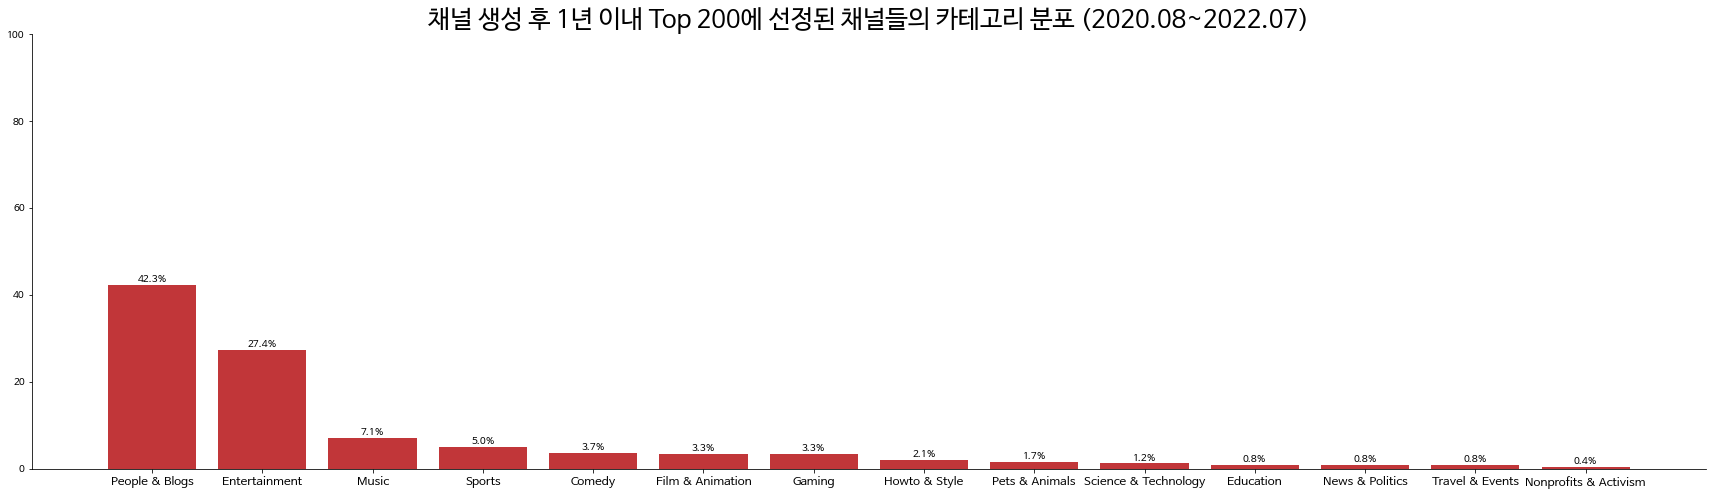

In [71]:
plt.figure(figsize=(30,8))
sns.set_palette(sns.color_palette("RdGy"))

x = np.arange(len(cat_sort.category_name.unique()))
a = plt.bar(x, height = cat_sort['ratio']) #color= #edgecolot = 
plt.xticks(x, cat_sort['category_name'], fontsize = 12)
plt.title('채널 생성 후 1년 이내 Top 200에 선정된 채널들의 카테고리 분포 (2020.08~2022.07)',fontsize = 25)
plt.ylim([0,100])
sns.despine()

for rect in a:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f%%' % height, ha='center', va='bottom', size = 10)
plt.show()

기존 인기동영상 전체 채널로 분석할 때와 달리 People & Blogs가 1등으로 올라왔고, film & animation의 순위도 많이 올라왔다.

Text(0.5, 1.0, '신생채널들의 카테고리 분포 (2020.08~2022.07)')

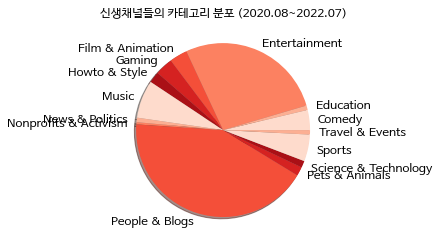

In [201]:
# 카테고리 분포, 파이그래프
sns.set_palette(sns.color_palette("Reds"))
plt.pie(cat['ratio'],
        labels = cat['category_name'],
        startangle = 0,
        textprops = {'fontsize':12},
        shadow = True)
plt.title('신생채널들의 카테고리 분포 (2020.08~2022.07)')

People & Blog 의 비율이 42.3 %로 확실히 다른 카테고리에 비해 비율이 높은 것을 확인할 수 있다. 기존 전체 트렌드 데이터셋의 경우 Entertainment가 People % Blog에 비해 비율이 높았던 것에 비해 다른 경향이 보인다. 

In [27]:
# newbie 중 People & Blogs 에 속한 채널에 뭐가 있는지 확인해보자
df['channelTitle'][df['category_name']=='People & Blogs'].head(20)

0             라떼월드 Latte World
4           집에서안나와 - with ANNA
7             케이밥스타 [K-밥 STAR]
9              호연지기 HOYEONJIGI
12                       영웅대백과
13                    양사랑 coco
14                       하희라이트
21                      부캐선발대회
23              Umaizing 엄정화tv
24                       띵스튜디오
25                      논리왕 전기
29                         슬리퍼
31                   개인사업자 임성빈
36                         안소희
37    Yoona's So Wonderful Day
39                 라포엠 LA POEM
40                         미란이
43                   은또 Euntto
44            Sumi Jo Official
45                 미지우 MEJIWOO
Name: channelTitle, dtype: object

연예인들이 유튜브 시작한 채널도 다 있네요...

## 숫자형 변수의 분포 확인하기

### 분석 전 데이터 전처리하기

In [28]:
df = df.astype({'view_count': 'int', 'likes':'int', 'dislikes':'int', 'comment_count':'int', 'tag_num':'int'})

In [29]:
# 요약통계량을 확인해보자
df.describe()

,view_count,likes,dislikes,comment_count,tag_num,minute_time,totalview,subscriber,time_diff
count,2.410000e+02,2.410000e+02,241.000000,241.000000,241.000000,215.000000,2.410000e+02,2.260000e+02,241.000000
mean,4.962560e+05,3.610985e+04,153.244813,3628.726141,15.601660,10.808760,5.941833e+07,3.489346e+05,150.033195
std,9.377449e+05,1.431002e+05,790.741289,15647.218929,18.432733,8.409904,9.305521e+07,7.010436e+05,112.234534
min,2.373300e+04,0.000000e+00,0.000000,23.000000,0.000000,0.133333,3.228620e+05,2.560000e+03,1.000000
25%,1.188940e+05,3.332000e+03,0.000000,402.000000,0.000000,3.908333,9.367207e+06,5.795000e+04,45.000000
50%,2.207400e+05,7.180000e+03,39.000000,824.000000,10.000000,9.650000,2.302829e+07,1.675000e+05,137.000000
75%,4.043550e+05,1.745700e+04,116.000000,1927.000000,22.000000,14.783333,7.198328e+07,3.465000e+05,241.000000
max,7.984160e+06,1.613136e+06,11828.000000,212614.000000,95.000000,50.833333,6.225524e+08,8.470000e+06,365.000000


### 조회수 분포

In [85]:
print(np.percentile(df['view_count'],100))
print(np.percentile(df['view_count'],95))


7984160.0
1955628.0


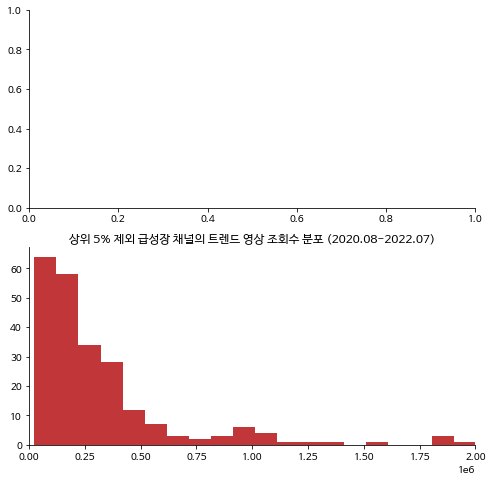

In [116]:
f, axes = plt.subplots(2)

f.set_size_inches((8, 8))
f.suptitle('조회수 분포 확인', fontsize = 15)
axes[0].hist(data = df, x='view_count', bins=40)
axes[0].set_title('급성장 채널의 트렌드 영상 조회수 분포 (2020.08-2022.07)', fontsize = 12)
sns.set_palette(sns.color_palette("RdGy"))
sns.despine()
axes[1].hist(data = df[df['view_count']<3000000], x='view_count', bins=30)
axes[1].set_title('상위 5% 제외 급성장 채널의 트렌드 영상 조회수 분포 (2020.08-2022.07)', fontsize = 12)
axes[1].set_xlim([0,2000000])
plt.show()

In [109]:
# 조회수가 600만 이상인 채널 보기
df['channelTitle'][df['view_count']>3000000]

52           Jennierubyjane Official
108                김종국 GYM JONG KOOK
185           7FATES: CHAKHO by HYBE
207    냠냠엔터테인먼트 YAMYAM ENTERTAINMENT
234                           Kep1er
Name: channelTitle, dtype: object

### 좋아요 수 분포


In [32]:
print(np.percentile(df['likes'],100))
print(np.percentile(df['likes'],90))


1613136.0
50964.0


C:\ProgramData\Anaconda3\envs\dsl_init\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


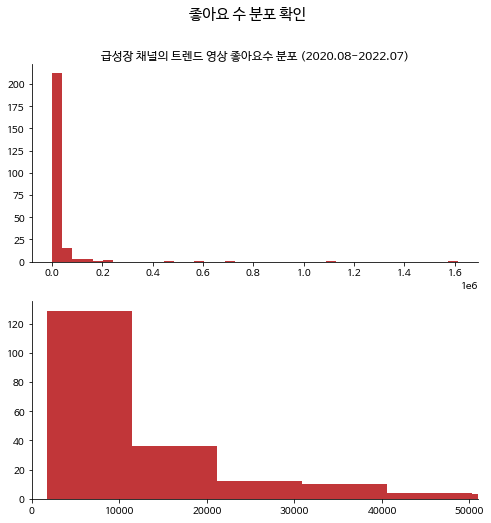

In [107]:
f, axes = plt.subplots(2)
f.set_size_inches((8, 8))
f.suptitle('좋아요 수 분포 확인', fontsize = 15)
axes[0].hist(data = df, x='likes', bins=40)
axes[0].set_title('급성장 채널의 트렌드 영상 좋아요수 분포 (2020.08-2022.07)', fontsize = 12)
sns.set_palette(sns.color_palette("RdGy"))
sns.despine()
axes[1].hist(data = df[df['likes']<np.percentile(df['likes'],95)][df['likes']>np.percentile(df['likes'],10)], x='likes')
# axes[1].set_title('상/하위 10% 제거시 신생채널 트렌드 데이터 좋아요 수 분포 (2020.08-2022.07)', fontsize = 12)
axes[1].set_xlim([0,51000])

plt.show()

### 싫어요 수 분포

In [34]:
print(np.percentile(df['dislikes'],100))
#print(np.percentile(df_2017_unique['view_count'],90))
print(np.percentile(df['dislikes'],90))

11828.0
235.0


C:\ProgramData\Anaconda3\envs\dsl_init\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == "__main__":


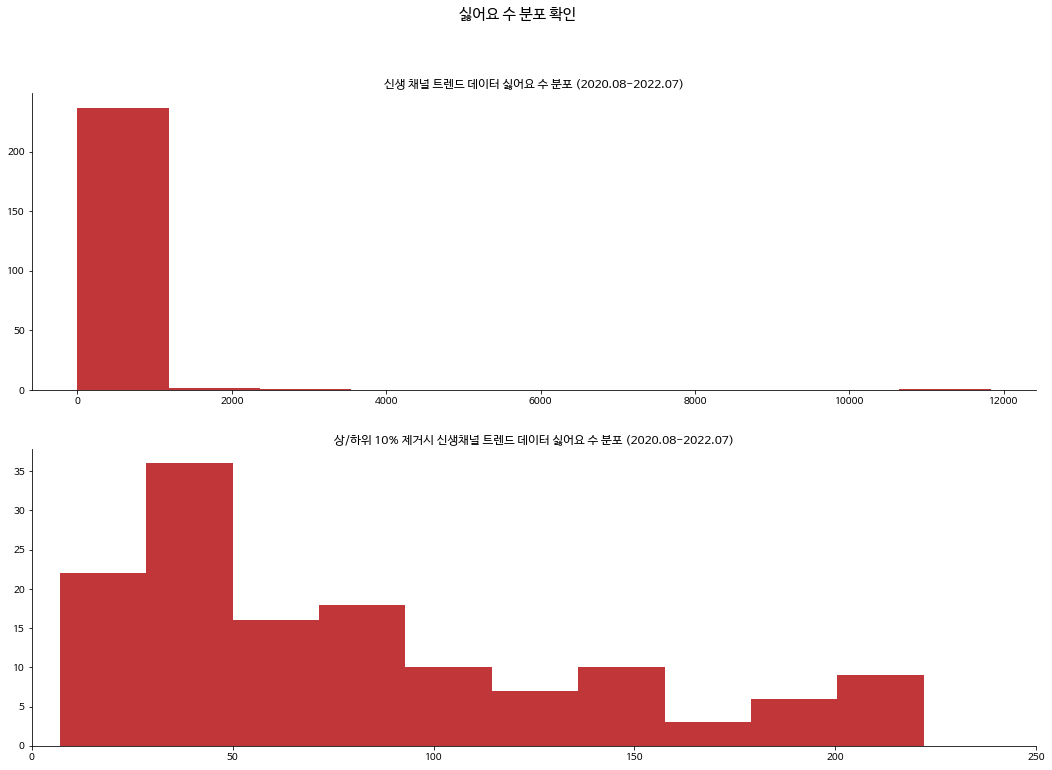

In [74]:
f, axes = plt.subplots(2)
f.set_size_inches((18, 12))
f.suptitle('싫어요 수 분포 확인', fontsize = 15)

axes[0].hist(data = df, x='dislikes')
axes[0].set_title('신생 채널 트렌드 데이터 싫어요 수 분포 (2020.08-2022.07)', fontsize = 12)
sns.set_palette(sns.color_palette("RdGy"))
sns.despine()
axes[1].hist(data = df[df['dislikes']<np.percentile(df['dislikes'],90)][df['dislikes']>np.percentile(df['dislikes'],10)], x='dislikes')
axes[1].set_title('상/하위 10% 제거시 신생채널 트렌드 데이터 싫어요 수 분포 (2020.08-2022.07)', fontsize = 12)
axes[1].set_xlim([0,250])

plt.show()

### 댓글 수 분포

In [36]:
print(np.percentile(df['comment_count'],100))
#print(np.percentile(df_2017_unique['view_count'],90))
print(np.percentile(df['comment_count'],90))

212614.0
4929.0


(0.0, 5000.0)

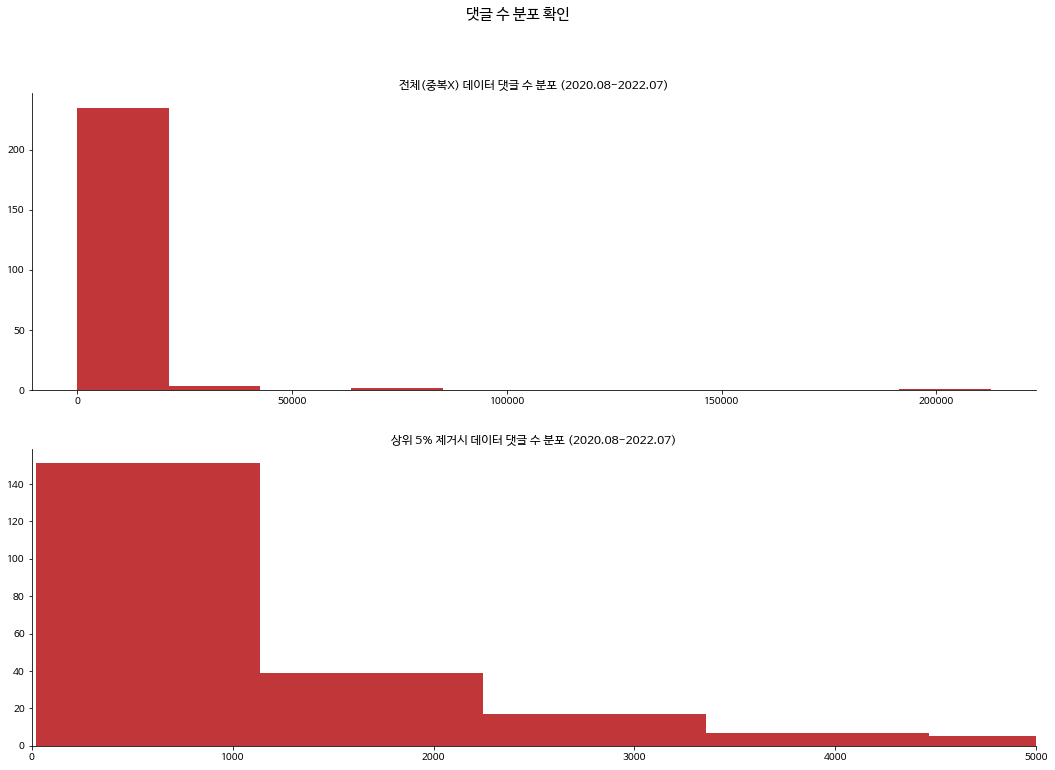

In [75]:
f, axes = plt.subplots(2)
f.set_size_inches((18, 12))
f.suptitle('댓글 수 분포 확인', fontsize = 15)
axes[0].hist(data = df, x='comment_count')
axes[0].set_title('전체(중복X) 데이터 댓글 수 분포 (2020.08-2022.07)', fontsize = 12)
sns.set_palette(sns.color_palette("RdGy"))
sns.despine()
axes[1].hist(data = df[df['comment_count']<np.percentile(df['comment_count'],95)], x='comment_count')
axes[1].set_title('상위 5% 제거시 데이터 댓글 수 분포 (2020.08-2022.07)', fontsize = 12)
axes[1].set_xlim([0,5000])

In [ ]:
f, axes = plt.subplots(2)
f.set_size_inches((18, 12))
f.suptitle('싫어요 수 분포 확인', fontsize = 15)

axes[0].hist(data = df, x='dislikes')
axes[0].set_title('신생 채널 트렌드 데이터 싫어요 수 분포 (2020.08-2022.07)', fontsize = 12)
sns.set_palette(sns.color_palette("RdGy"))
sns.despine()
axes[1].hist(data = df[df['dislikes']<np.percentile(df['dislikes'],90)][df['dislikes']>np.percentile(df['dislikes'],10)], x='dislikes')
axes[1].set_title('상/하위 10% 제거시 신생채널 트렌드 데이터 싫어요 수 분포 (2020.08-2022.07)', fontsize = 12)
axes[1].set_xlim([0,250])

plt.show()

### 그 채널의 전체 영상 조회수 분포

In [38]:
print(np.percentile(df['totalview'],100))
print(np.percentile(df['totalview'],90))

622552394.0
141761224.0


(0.0, 190000000.0)

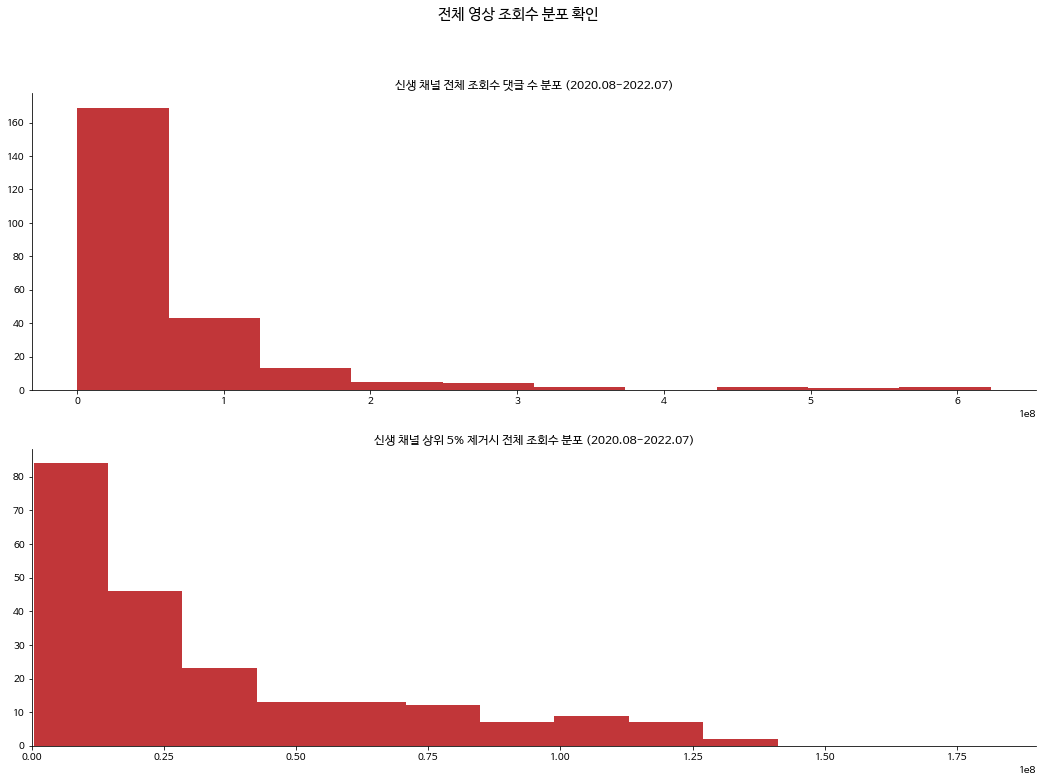

In [76]:
f, axes = plt.subplots(2)
f.set_size_inches((18, 12))
f.suptitle('전체 영상 조회수 분포 확인', fontsize = 15)
axes[0].hist(data = df, x='totalview')
axes[0].set_title('신생 채널 전체 조회수 댓글 수 분포 (2020.08-2022.07)', fontsize = 12)
sns.set_palette(sns.color_palette("RdGy"))
sns.despine()
axes[1].hist(data = df[df['totalview']<np.percentile(df['totalview'],90)], x='totalview')
axes[1].set_title('신생 채널 상위 5% 제거시 전체 조회수 분포 (2020.08-2022.07)', fontsize = 12)
axes[1].set_xlim([0,190000000])

### 그 채널의 전체 영상 조회수 분포

In [40]:
print(np.percentile(df['totalview'],100))
print(np.percentile(df['totalview'],90))

622552394.0
141761224.0


(0.0, 190000000.0)

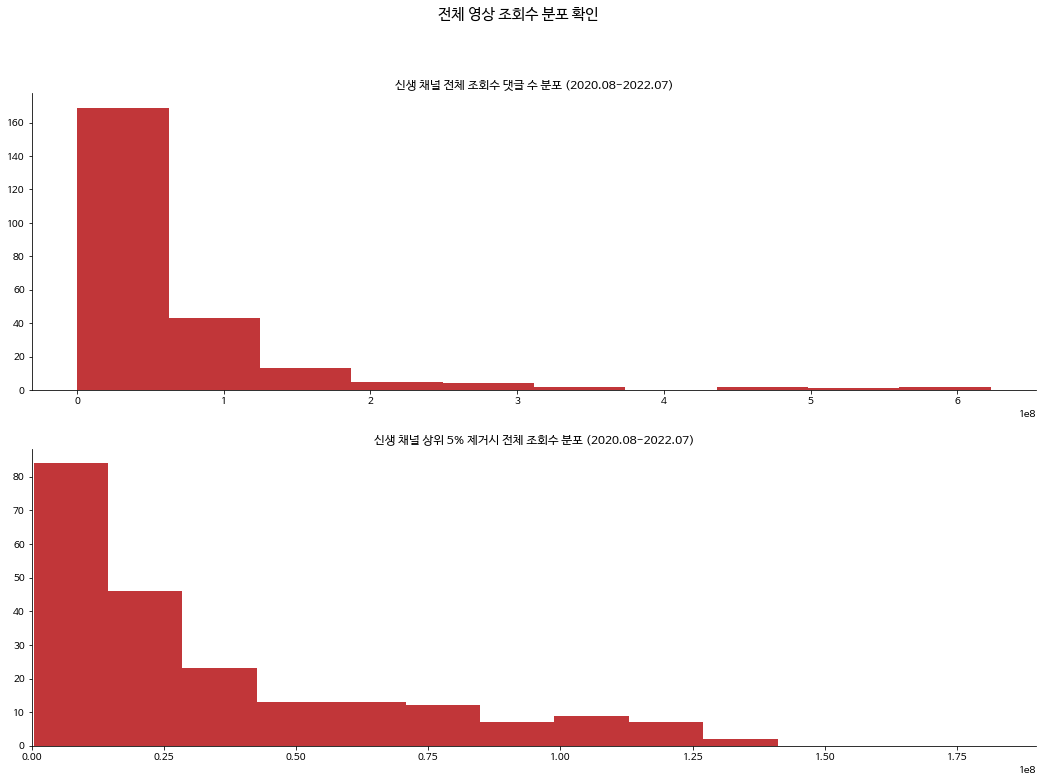

In [77]:
f, axes = plt.subplots(2)
f.set_size_inches((18, 12))
f.suptitle('전체 영상 조회수 분포 확인', fontsize = 15)
axes[0].hist(data = df, x='totalview')
axes[0].set_title('신생 채널 전체 조회수 댓글 수 분포 (2020.08-2022.07)', fontsize = 12)
sns.set_palette(sns.color_palette("RdGy"))
sns.despine()
axes[1].hist(data = df[df['totalview']<np.percentile(df['totalview'],90)], x='totalview')
axes[1].set_title('신생 채널 상위 5% 제거시 전체 조회수 분포 (2020.08-2022.07)', fontsize = 12)
axes[1].set_xlim([0,190000000])

### 신생 채널 구독자수 분포

In [42]:
print(np.percentile(df['subscriber'],100))
print(np.percentile(df['subscriber'],90))

nan
nan


(0.0, 3000000.0)

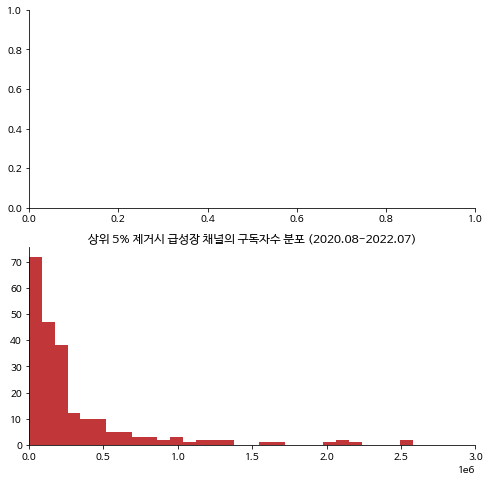

In [162]:
f, axes = plt.subplots(2)
f.set_size_inches((8, 8))
# f.suptitle('구독자수 확인', fontsize = 15)
# axes[0].hist(data = df, x='subscriber', bins = 40)
# axes[0].set_title('신생 채널 전체 조회수 댓글 수 분포 (2020.08-2022.07)', fontsize = 12)
sns.set_palette(sns.color_palette("RdGy"))
sns.despine()
axes[1].hist(df['subscriber'][df['subscriber']<3000000], bins = 30)
axes[1].set_title('상위 5% 제거시 급성장 채널의 구독자수 분포 (2020.08-2022.07)', fontsize = 12)
axes[1].set_xlim([0,3000000])

In [140]:
# print(np.percentile(df['subscriber'],0))
df['subscriber']

0       138000.0
1       769000.0
2      1660000.0
3        41900.0
4       429000.0
         ...    
236      32100.0
237     446000.0
238          NaN
239      56200.0
240     109000.0
Name: subscriber, Length: 241, dtype: float64

In [172]:
# 조회수가 600만 이상인 채널 보기
df['channelTitle'][df['category_name']=='People & Blogs'][df['subscriber']>200000]

4            집에서안나와 - with ANNA
7              케이밥스타 [K-밥 STAR]
25                       논리왕 전기
36                          안소희
37     Yoona's So Wonderful Day
40                          미란이
45                  미지우 MEJIWOO
47                leeminho film
51     검은고양이 다홍 Blackcat Dahong
52      Jennierubyjane Official
62                        보개미TV
70                    살빼조DietJo
71                   임영웅 Shorts
86                         도장TV
87                        Pixid
95                          승상싱
96                      혀니콤보 TV
99                천뚱 1000ddoong
103       집나간햄지 Wandering Hamzy
104                        햇도시락
106                       소비더머니
114                       휴먼스토리
119          지켜츄 Chuu Can Do It
123           내주제에 Dare U Naeju
128                         강혜원
129                         너덜트
134                     조씨Jossi
138                        웃음박재
141                    동네친구 강나미
144                     차린건 없지만
152                     먹보스 쭈엽이
160     

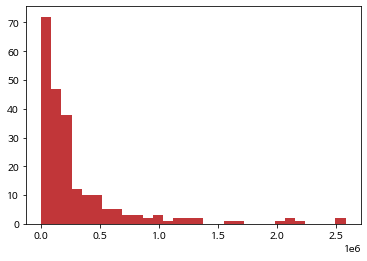

In [161]:
# Entertainment를 제한 카테고리들의 신생채널 구독자수
plt.hist(df['subscriber'][df['subscriber']<3000000], bins = 30)
plt.title()
plt.show()

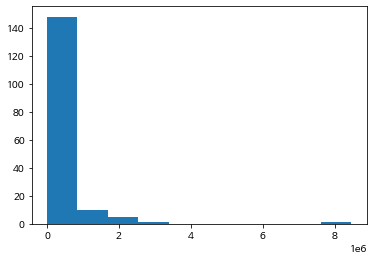

In [44]:
# Entertainment를 제한 카테고리들의 신생채널 구독자수
plt.hist(df['subscriber'][df['category_name']!='Entertainment'])
plt.show()

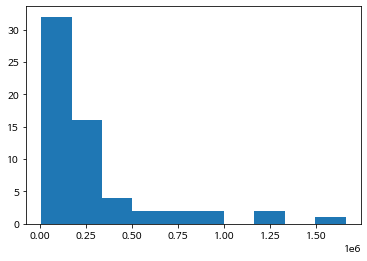

In [45]:
# Entertainment 카테고리의 신생채널 구독자수
plt.hist(df['subscriber'][df['category_name']=='Entertainment'])
plt.show()

# 이변량 분석

## 조회수, 좋아요 수, 싫어요 수, 댓글 수의 관계 확인

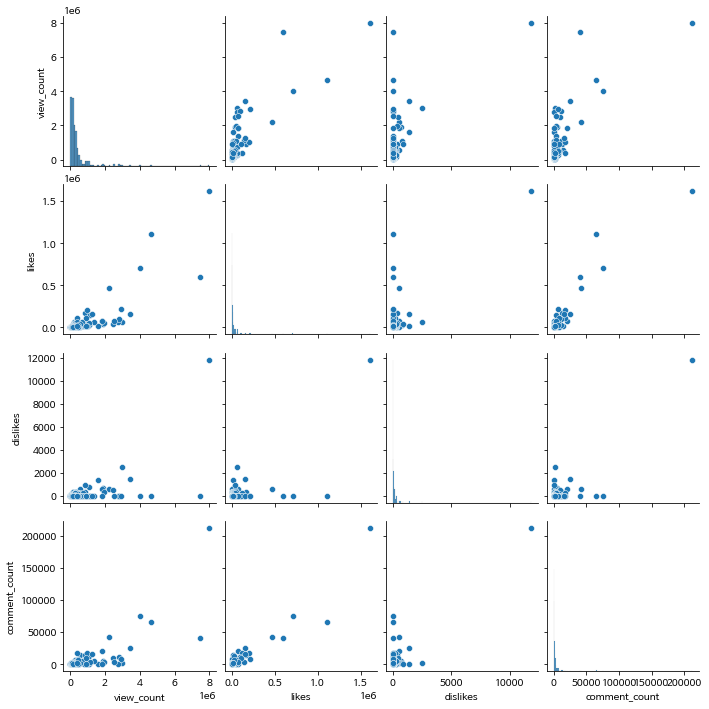

In [46]:
sns.pairplot(df[['view_count','likes','dislikes','comment_count']], diag_kind='hist')
plt.show()

## 신생 채널 카테고리별 구독자수 분포

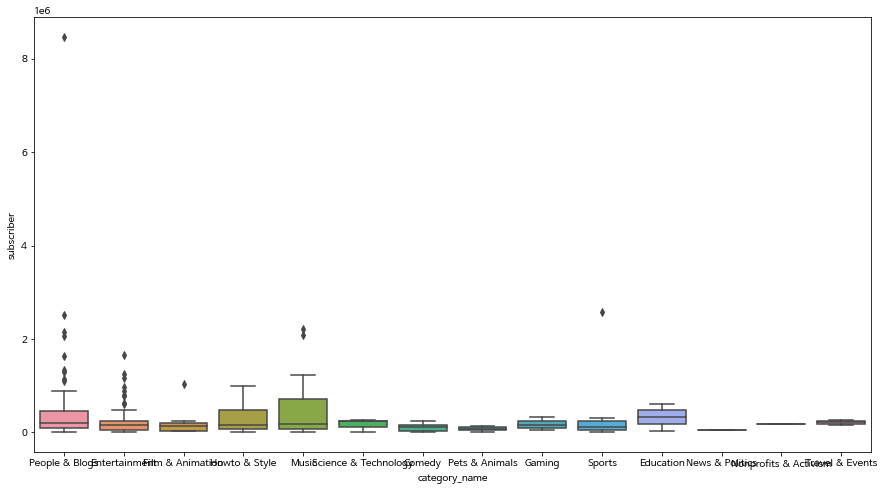

In [47]:
# 카테고리별 채널들의 구독자수 분포 (boxplot)
plt.figure(figsize = (15, 8))
sns.boxplot(data = df[['subscriber', 'category_name']], x='category_name', y = 'subscriber')
plt.show()

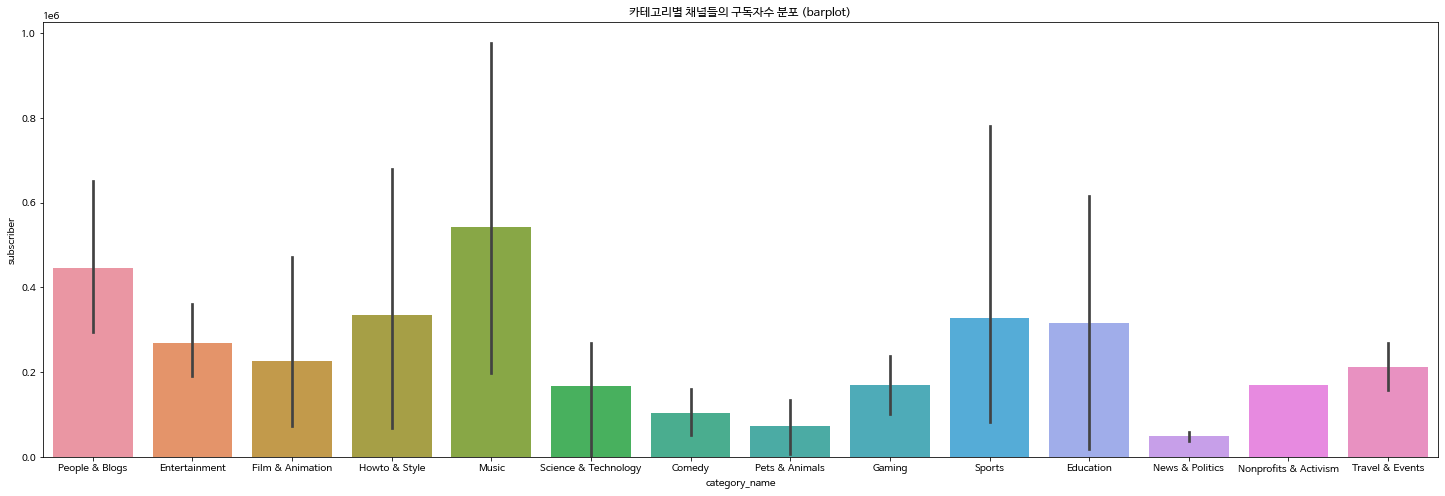

In [52]:
# 카테고리별 채널들의 구독자수 분포 (boxplot)
plt.figure(figsize = (25, 8))
sns.barplot(data = df[['subscriber', 'category_name']], x='category_name', y = 'subscriber')
plt.title("카테고리별 채널들의 구독자수 분포 (barplot)")
plt.show()

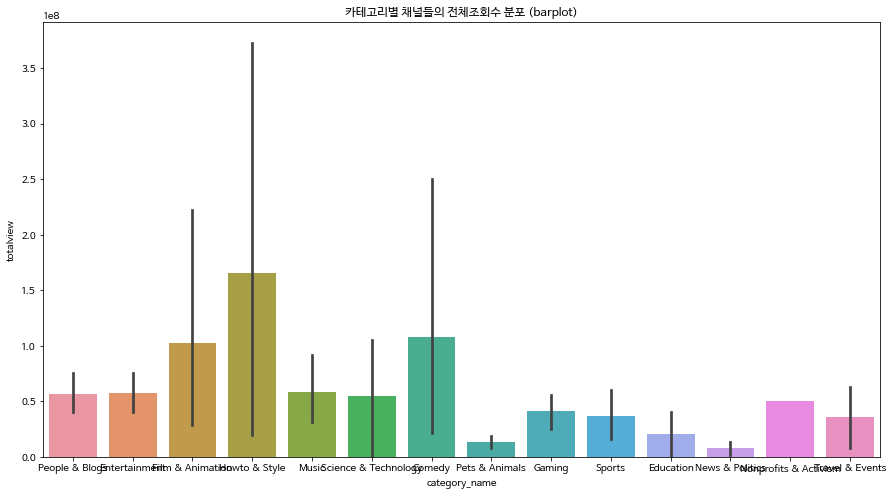

In [49]:
# 카테고리별 신생채널들의 전체 조회수 분포 (barplot)
plt.figure(figsize = (15, 8))
sns.barplot(data = df[['totalview', 'category_name']], x='category_name', y = 'totalview')
plt.title("카테고리별 채널들의 전체조회수 분포 (barplot)")
plt.show()